# Price Prediction - Uber and Lyft Data
$\it{Developed~by~Weiting~Ho~@July~2020}$

<br><center><img src="uber-vs-lyft-banner.jpg" width="500"></center>



## Data Overview: __[[Reference: Kaggle]](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma)__

- id - Unique identifier for each column
- Timestamp - Unix Timestamp
- hour - Hour of the day
- day - Day of the week
- month - Month in a year
- datetime - Date value
- timezone - Timezone
- source - Initial source of the ride
- destination - Destination of the ride
- cab_type - The type of cab
- price - Price of the ride
- distance - Total distance of the requested ride
- surge_multiplier - Times of the normal price
- temperature - Temperature of the ride
- apparentTemperature -	Apparent temperature of the ride
- summary - weather report summary of the day
- humidity - Humidity of the ride
- windSpeed - Wind speed of the ride
- windGust - Wind gust of the ride						
- uvIndex - UV index of the ride

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_raw = pd.read_csv('uber_and_lyft.csv')
np.random.seed(500)
rows = np.random.randint(0, 637976, 10000)
df = df_raw.loc[rows].reset_index().drop(['index'], axis=1)
print('The shape of the dataset becomes {}.\n'.format(df.shape))

The shape of the dataset becomes (10000, 24).



In [7]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,...,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase
0,21,30,11,Fenway,Back Bay,Uber,UberXL,13.0,1.50,1.0,...,3.27,4.24,9.839,27.35,1017.09,278,1.00,0,280.7,0.79
1,7,15,12,Financial District,South Station,Uber,WAV,14.0,0.39,1.0,...,5.21,7.94,10.000,44.19,1022.09,226,0.87,0,297.5,0.27
2,11,29,11,North End,West End,Lyft,Shared,3.5,1.25,1.0,...,8.59,10.54,9.937,27.31,1004.67,308,0.25,0,341.3,0.75
3,23,2,12,Northeastern University,North Station,Lyft,Lux Black XL,38.5,3.25,1.0,...,2.83,2.98,7.790,47.81,1002.81,275,1.00,0,287.3,0.86
4,20,17,12,Financial District,Boston University,Lyft,Lux,27.5,5.24,1.0,...,6.99,8.23,9.808,31.96,999.80,286,0.77,0,350.3,0.33


In [8]:
# Move column 'price' to first column in the dataframe.
s = df.pop('price')
df = pd.concat([s, df], axis=1)
df.head()

,price,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,...,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase
0,13.0,21,30,11,Fenway,Back Bay,Uber,UberXL,1.50,1.0,...,3.27,4.24,9.839,27.35,1017.09,278,1.00,0,280.7,0.79
1,14.0,7,15,12,Financial District,South Station,Uber,WAV,0.39,1.0,...,5.21,7.94,10.000,44.19,1022.09,226,0.87,0,297.5,0.27
2,3.5,11,29,11,North End,West End,Lyft,Shared,1.25,1.0,...,8.59,10.54,9.937,27.31,1004.67,308,0.25,0,341.3,0.75
3,38.5,23,2,12,Northeastern University,North Station,Lyft,Lux Black XL,3.25,1.0,...,2.83,2.98,7.790,47.81,1002.81,275,1.00,0,287.3,0.86
4,27.5,20,17,12,Financial District,Boston University,Lyft,Lux,5.24,1.0,...,6.99,8.23,9.808,31.96,999.80,286,0.77,0,350.3,0.33


## Data Preprocessing
This section contains:
- Dealing with missing value
- Explore the data with visualization
- Data scaling

###  Missing Values

In [9]:
print('The distribution of NaN across each column:')
print(df.isnull().sum())

# Randomly replace 5% of records with NaN
np.random.seed(500)
df.iloc[:, 1:] = df.iloc[:, 1:].mask(
    np.random.random((df.shape[0], df.shape[1] - 1)) < 0.06)
tot_nan = df.isnull().sum().sum()
print(
    '\nAfter randomly replacing missing values, we now have {0} NaN\'s across the dataset, it\'s approximate to the\nproportion of {1:.1%} in the dataset.'
    .format(tot_nan, tot_nan / (df.shape[0] * df.shape[1])))

The distribution of NaN across each column:
price                  0
hour                   0
day                    0
month                  0
source                 0
destination            0
cab_type               0
name                   0
distance               0
surge_multiplier       0
temperature            0
apparentTemperature    0
short_summary          0
humidity               0
windSpeed              0
windGust               0
visibility             0
dewPoint               0
pressure               0
windBearing            0
cloudCover             0
uvIndex                0
ozone                  0
moonPhase              0
dtype: int64

After randomly replacing missing values, we now have 13827 NaN's across the dataset, it's approximate to the
proportion of 5.8% in the dataset.


In [10]:
# Fill NULL values
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill',
          inplace=True)  # in case that having NaN in the first row

# Check NULL values
print('After dealing with missing values, we got {} NaN now.'.format(
    df.isnull().sum().sum()))

After dealing with missing values, we got 0 NaN now.


### Exploratory Data Analysis

In [11]:
df.head()

,price,hour,day,month,source,destination,cab_type,name,distance,surge_multiplier,...,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase
0,13.0,21.0,30.0,11.0,Fenway,Back Bay,Uber,UberXL,1.50,1.0,...,3.27,4.24,9.839,27.35,1017.09,278.0,1.00,0.0,280.7,0.79
1,14.0,7.0,15.0,12.0,Financial District,South Station,Uber,WAV,0.39,1.0,...,5.21,7.94,10.000,44.19,1022.09,226.0,0.87,0.0,297.5,0.27
2,3.5,11.0,29.0,11.0,North End,West End,Lyft,Shared,1.25,1.0,...,8.59,10.54,9.937,27.31,1004.67,308.0,0.25,0.0,341.3,0.75
3,38.5,23.0,2.0,12.0,Northeastern University,North Station,Lyft,Lux Black XL,3.25,1.0,...,2.83,2.98,7.790,47.81,1002.81,308.0,1.00,0.0,287.3,0.86
4,27.5,20.0,17.0,12.0,Financial District,Boston University,Lyft,Lux,5.24,1.0,...,6.99,8.23,9.808,31.96,999.80,286.0,0.77,0.0,350.3,0.33


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                10000 non-null  float64
 1   hour                 10000 non-null  float64
 2   day                  10000 non-null  float64
 3   month                10000 non-null  float64
 4   source               10000 non-null  object 
 5   destination          10000 non-null  object 
 6   cab_type             10000 non-null  object 
 7   name                 10000 non-null  object 
 8   distance             10000 non-null  float64
 9   surge_multiplier     10000 non-null  float64
 10  temperature          10000 non-null  float64
 11  apparentTemperature  10000 non-null  float64
 12  short_summary        10000 non-null  object 
 13  humidity             10000 non-null  float64
 14  windSpeed            10000 non-null  float64
 15  windGust             10000 non-null  

__Re-define the categorical data__

In [13]:
# Transform datatype for selected coulumns from float to category.
from pandas.api.types import CategoricalDtype

df['uvIndex'] = pd.Categorical(df['uvIndex'].astype('category'),
                               categories=['0', '1', '2'],
                               ordered=True)
df[['source', 'destination', 'cab_type', 'name', 'short_summary'
    ]] = df[['source', 'destination', 'cab_type', 'name',
             'short_summary']].astype('category')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   price                10000 non-null  float64 
 1   hour                 10000 non-null  float64 
 2   day                  10000 non-null  float64 
 3   month                10000 non-null  float64 
 4   source               10000 non-null  category
 5   destination          10000 non-null  category
 6   cab_type             10000 non-null  category
 7   name                 10000 non-null  category
 8   distance             10000 non-null  float64 
 9   surge_multiplier     10000 non-null  float64 
 10  temperature          10000 non-null  float64 
 11  apparentTemperature  10000 non-null  float64 
 12  short_summary        10000 non-null  category
 13  humidity             10000 non-null  float64 
 14  windSpeed            10000 non-null  float64 
 15  windGust            

In [15]:
df.describe()

,price,hour,day,month,distance,surge_multiplier,temperature,apparentTemperature,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,ozone,moonPhase
count,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,16.495850,11.699800,17.83980,11.585900,2.183250,1.016750,39.627745,35.953217,0.739895,6.150197,8.423519,8.497759,31.678657,1010.185292,219.568800,0.684941,313.579220,0.577124
std,9.396504,6.987887,9.93511,0.492591,1.133552,0.102019,6.685205,7.914762,0.139124,3.127120,5.271145,2.576205,9.099402,13.612909,98.548131,0.359503,27.797253,0.245527
min,2.500000,0.000000,1.00000,11.000000,0.030000,1.000000,18.910000,12.130000,0.380000,0.450000,0.800000,0.717000,4.390000,988.090000,2.000000,0.000000,269.400000,0.090000
25%,9.000000,6.000000,13.00000,11.000000,1.270000,1.000000,36.450000,31.910000,0.640000,3.410000,4.060000,8.459000,27.490000,999.800000,124.000000,0.370000,291.100000,0.300000
50%,13.500000,12.000000,17.00000,12.000000,2.150000,1.000000,40.610000,35.920000,0.710000,5.890000,7.480000,9.880000,30.890000,1009.430000,257.000000,0.825000,307.600000,0.680000
75%,22.500000,18.000000,28.00000,12.000000,2.930000,1.000000,43.570000,40.080000,0.880000,8.390000,11.710000,10.000000,38.120000,1021.980000,303.000000,1.000000,331.800000,0.790000
max,80.500000,23.000000,30.00000,12.000000,7.500000,2.500000,57.220000,57.220000,0.960000,15.000000,27.250000,10.000000,50.670000,1035.550000,356.000000,1.000000,378.900000,0.930000


__Show the distribution of price__

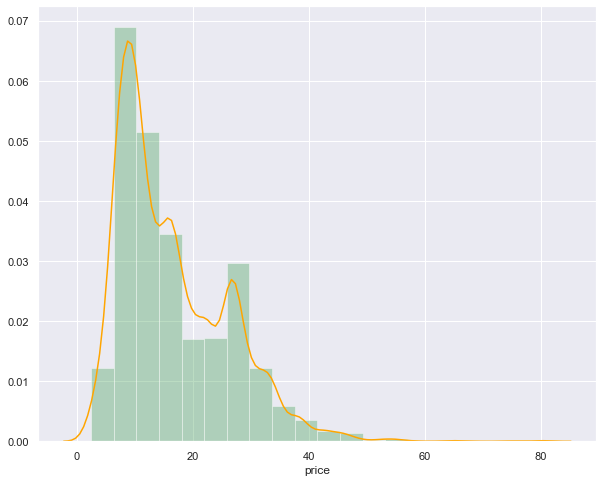

In [16]:
plt.figure(figsize=(10, 8))
sns.distplot(df['price'], color='g', bins=20, hist_kws={'alpha': 0.4}, kde_kws={"color": "orange"})
plt.show()

__Show the distribution of categorical features__

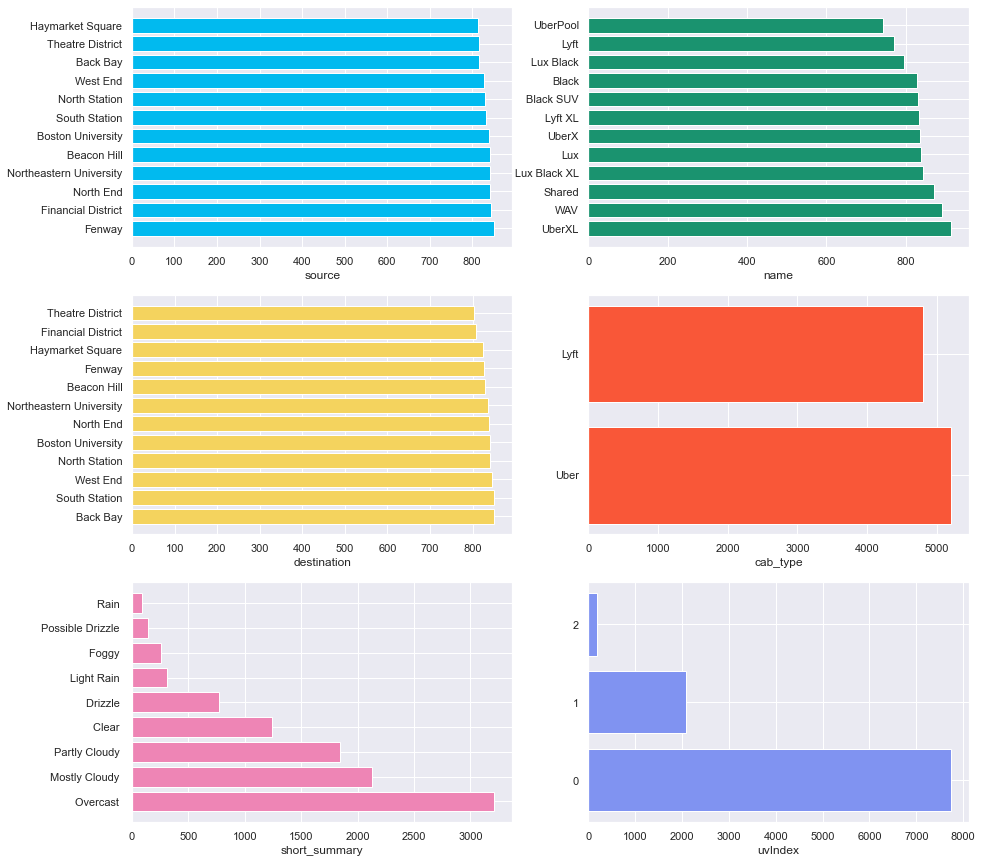

In [17]:
from itertools import product

df_cat = df.select_dtypes(include = ['object', 'category'])
fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
columns = df_cat.columns[[0, 3, 1, 2, 4, 5]]
position = list(product([0, 1, 2], [0, 1]))
color = ['#01baef', '#1a936f', '#f4d35e', '#f95738', '#ee85b5', '#8093f1']

for p, c, n in zip(position, columns, color):
    plt.sca(axes[p[0], p[1]])
    x_axis = df[c].unique()
    y_axis = df[c].value_counts()
    plt.barh(x_axis, y_axis, color=n)
    plt.xlabel(c)

__Redefine and reclassify data type, range and category.__

In [18]:

def bodytemp(f):
    if f >= 40:
        x = 2
    if f >= 30:
        x = 1
    else:
        x = 0
    return x

def cloud(cover):
    if cover >= 0.9:
        x = 1
    else:
        x = 0
    return x


def day_group(day):
    if day >= 20:
        x = 2
    elif day >= 10:
        x = 1
    else:
        x = 0
    return x

def moon(phase):
    if phase >= 0.5:
        x = 1
    else:
        x = 0
    return x

In [19]:
df['apparentTemperature'] = df['apparentTemperature'].map(bodytemp)
df['cloudCover'] = df['cloudCover'].map(cloud)
df['day'] = df['day'].map(day_group)
df['moonPhase'] = df['moonPhase'].map(moon)

df[['apparentTemperature', 'cloudCover', 'day', 'moonPhase'
    ]] = df[['apparentTemperature', 'cloudCover', 'day',
             'moonPhase']].astype('category')

df['apparentTemperature'] = pd.Categorical(df['apparentTemperature'],
                                           categories=[0, 1, 2],
                                           ordered=True)
df['cloudCover'] = pd.Categorical(df['cloudCover'],
                                  categories=[0, 1],
                                  ordered=True)
df['day'] = pd.Categorical(df['day'].astype('category'),
                           categories=[0, 1, 2],
                           ordered=True)
df['moonPhase'] = pd.Categorical(df['moonPhase'].astype('category'),
                                 categories=[0, 1],
                                 ordered=True)

__Show the distribution of continuous features__

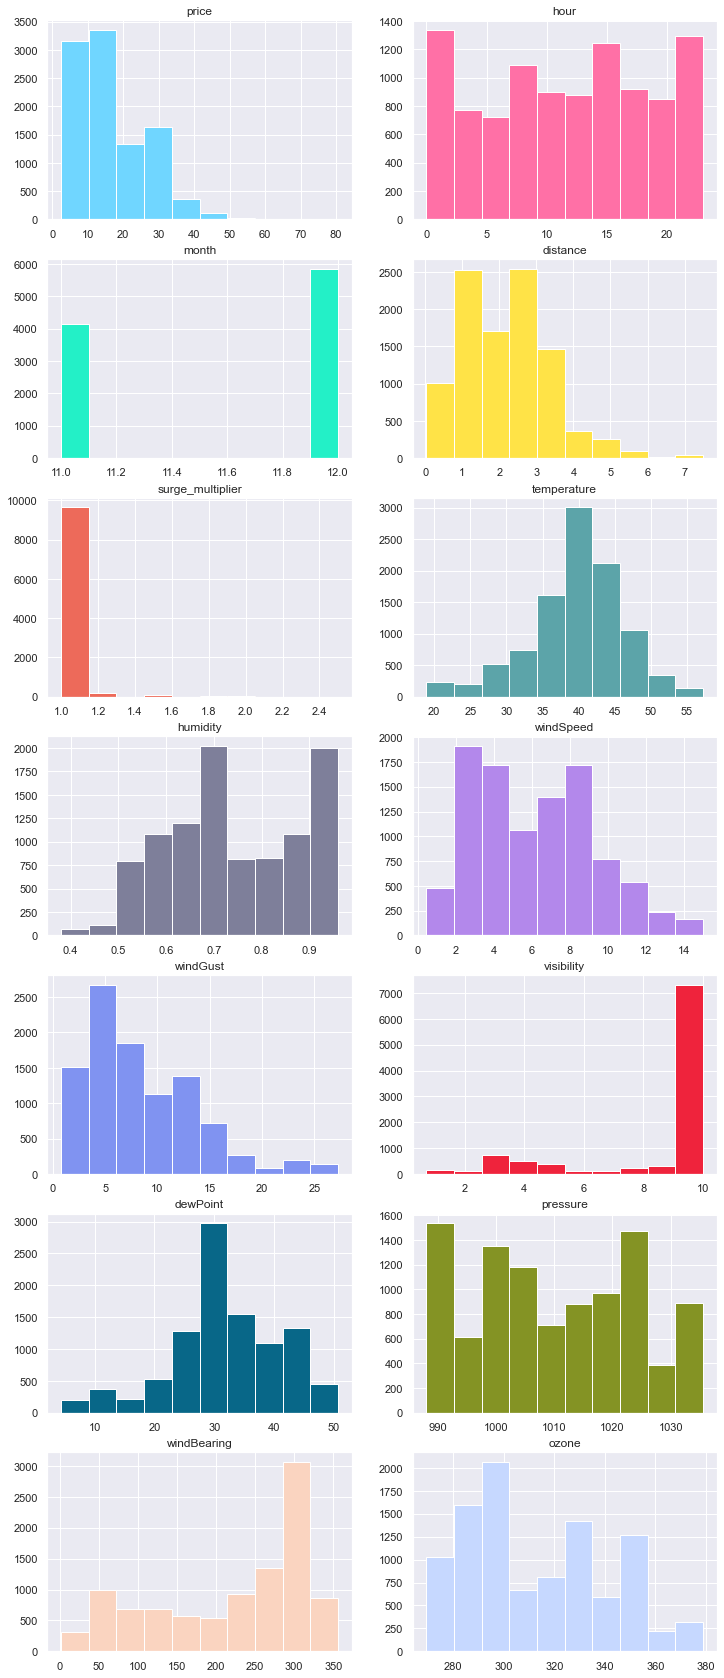

In [20]:
fig, axes = plt.subplots(ncols=2, nrows=7, figsize=(12, 30))
df_num = df.select_dtypes(include = ['float64', 'int64']) 
columns = df_num
position = list(product([0, 1, 2, 3, 4, 5, 6 ,7], [0, 1]))
color = ['#70d6ff', '#ff70a6', '#23f0c7', '#ffe347', '#ed6a5a', '#5ca4a9', '#7e7f9a', '#b388eb', '#8093f1',
        '#ef233c', '#086788', '#849324', '#fad4c0', '#c6d8ff', '#009ffd', '#ab8476', '#cae7b9', '#fece86']

for p, c, n in zip(position, columns, color):
    plt.sca(axes[p[0], p[1]])
    plt.hist(df[c], color=n)
    plt.title(c)

__Correlation between features and price__

In [21]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num_corr = df_num.corr()['price'][1:]
df_num_corr

hour               -0.006802
month               0.005117
distance            0.320287
surge_multiplier    0.236502
temperature         0.011962
humidity            0.017830
windSpeed          -0.012622
windGust           -0.020020
visibility         -0.008912
dewPoint            0.020017
pressure            0.005526
windBearing        -0.007103
ozone              -0.028870
Name: price, dtype: float64

__Correlation between features and features__

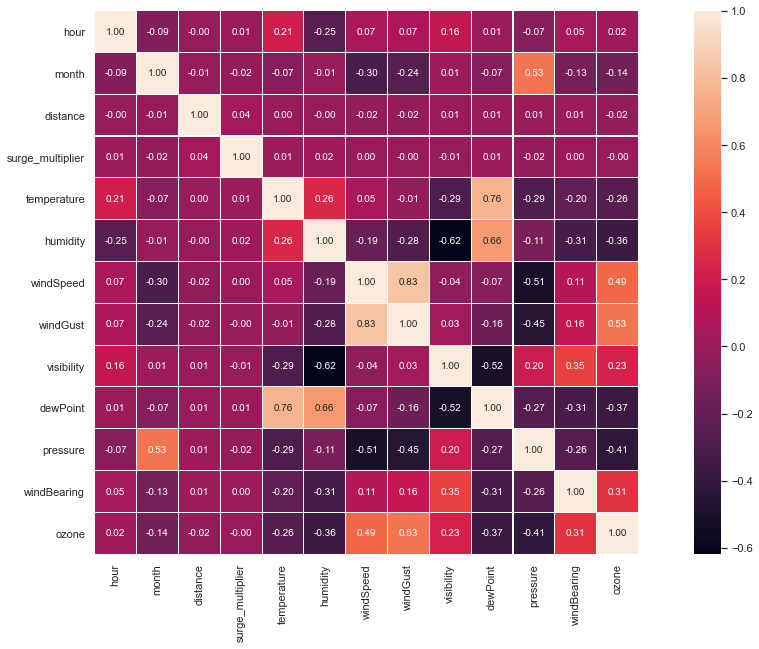

In [22]:
corr = df.drop('price', axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, vmax=1.0, linewidths=0.1, annot=True, 
                 annot_kws={'size':10}, square=True, fmt=".2f")
plt.show()

Remove high correlation features to avoid collinearity issue.

In [23]:
df1 = df.copy()
df1 = df1.drop(['temperature', 'windGust', 'dewPoint'], axis=1)

__Transform features belong to category type and object type to dummy variables.__

In [24]:
df1 = pd.get_dummies(df, columns=['source', 'destination', 'cab_type', 'name', 
                            'short_summary'], drop_first=True)

__Scaling Data__  
After reorganizing whole dataset, we use MinMaxScaler to scale dataset and split it for train data size is 80% and test data size is 20%.

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [26]:
X = df1.drop(['price'],axis=1)
y = df1['price']

In [27]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

## Regression Model

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

### KNN Regressor

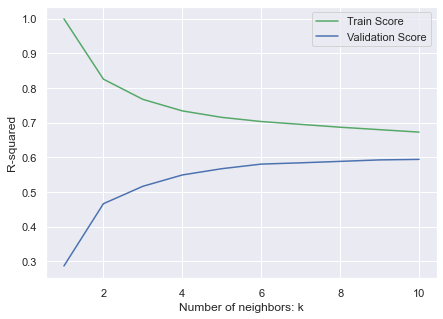

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.672944,0.594325,{'n_neighbors': 10}
2,0.680024,0.592802,{'n_neighbors': 9}
3,0.687078,0.588585,{'n_neighbors': 8}
4,0.695278,0.584387,{'n_neighbors': 7}
5,0.703498,0.580712,{'n_neighbors': 6}
6,0.715489,0.567475,{'n_neighbors': 5}
7,0.734139,0.549410,{'n_neighbors': 4}
8,0.767381,0.516756,{'n_neighbors': 3}
9,0.825654,0.466544,{'n_neighbors': 2}


In [25]:
# view the complete results
param_grid = {'n_neighbors': list(range(1, 11))}
knn_reg = GridSearchCV(KNeighborsRegressor(),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
knn_reg.fit(X_train, y_train)
knn_result = pd.DataFrame(knn_reg.cv_results_)
knn_result.index = knn_result.rank_test_score


# plot the mean cross-validation scores
x_axis = range(1,11)
plt.figure(figsize=(7, 5))
plt.plot(x_axis, knn_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_axis, knn_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.legend()
plt.xlabel('Number of neighbors: k')
plt.ylabel('R-squared')
plt.show()

knn_result[['mean_train_score', 'mean_test_score', 'params']].sort_index()

In [26]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    knn_reg.best_params_, knn_reg.best_score_))

Best Parameter: {'n_neighbors': 10}
Average cross-validation score: 0.5943


### Linear Regression Using Normal Equation

In [27]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
print('Training Score: {:.4f}'.format(lreg.score(X_train, y_train)))
score = cross_val_score(lreg, X_train, y_train, cv = 5).mean()
print("Average cross-validation score: {:.4f}".format(score.mean()))

Training Score: 0.8218
Average cross-validation score: 0.8189


### Ridge

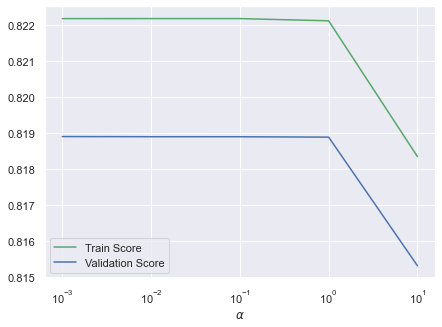

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.822189,0.818908,{'alpha': 0.1}
2,0.822189,0.818903,{'alpha': 0.01}
3,0.822189,0.818903,{'alpha': 0.001}
4,0.822127,0.818892,{'alpha': 1}
5,0.818351,0.815316,{'alpha': 10}


In [28]:
# view the complete results
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
ridge_reg = GridSearchCV(Ridge(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
ridge_reg.fit(X_train, y_train)
ridge_result = pd.DataFrame(ridge_reg.cv_results_)
ridge_result.index = ridge_result.rank_test_score
ridge_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(7, 5))
plt.plot(x_range, ridge_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, ridge_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

ridge_result[['mean_train_score', 'mean_test_score', 'params']]

In [29]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    ridge_reg.best_params_, ridge_reg.best_score_))

Best Parameter: {'alpha': 0.1}
Average cross-validation score: 0.8189


### Lasso

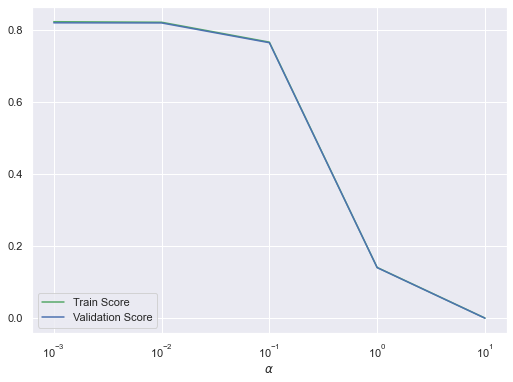

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.822148,0.819080,"{'alpha': 0.001, 'max_iter': 10000}"
2,0.820662,0.818728,"{'alpha': 0.01, 'max_iter': 10000}"
3,0.765489,0.763869,"{'alpha': 0.1, 'max_iter': 10000}"
4,0.140410,0.139774,"{'alpha': 1, 'max_iter': 10000}"
5,0.000000,-0.000500,"{'alpha': 10, 'max_iter': 10000}"


In [30]:
# view the complete results
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10], 'max_iter':[10000]}
lasso_reg = GridSearchCV(Lasso(random_state=0),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
lasso_reg.fit(X_train, y_train)
lasso_result = pd.DataFrame(lasso_reg.cv_results_)
lasso_result.index = lasso_result.rank_test_score
lasso_result.sort_index(inplace=True)

# plot the mean cross-validation scores
x_range = [0.001, 0.01, 0.1, 1, 10]
plt.figure(figsize=(8.5, 6))
plt.plot(x_range, lasso_result['mean_train_score'], c = 'g', label = 'Train Score')
plt.plot(x_range, lasso_result['mean_test_score'], c = 'b', label = 'Validation Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.show()

lasso_result[['mean_train_score', 'mean_test_score', 'params']]

In [31]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    lasso_reg.best_params_, lasso_reg.best_score_))

Best Parameter: {'alpha': 0.001, 'max_iter': 10000}
Average cross-validation score: 0.8191


### Polynomial Regression

In [32]:
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    scores = cross_val_score(LinearRegression(), X_train_poly, y_train, cv=5)
    print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.8011184  0.82039321 0.81143276 0.81720204 0.84436821]
Cross-validation scores: [-2.49418066e+15 -1.73782616e+16 -1.38051664e+15 -2.23632468e+16
  8.11799787e-01]


In [33]:
best_score = 0
for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    score = cross_val_score(lreg, X_train_poly, y_train, cv = 5).mean()
    if score > best_score:
            best_score = score
            best_parameters = {'degree': n}

print("Best parameters: {}".format(best_parameters))
print("Average cross-validation score: {:.4f}".format(best_score))

Best parameters: {'degree': 1}
Average cross-validation score: 0.8189


### Linear Support Vector Machine

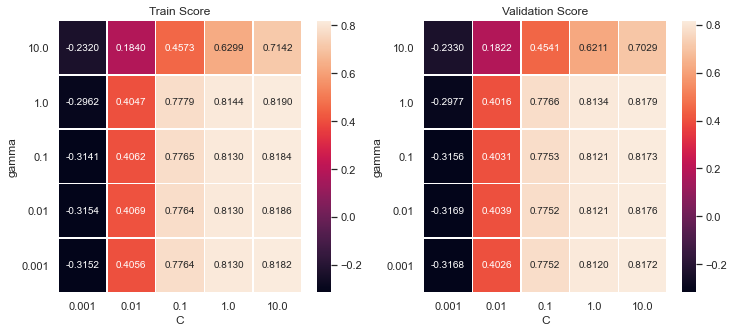

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.818980,0.817949,"{'C': 10, 'epsilon': 1}"
2,0.818555,0.817619,"{'C': 10, 'epsilon': 0.01}"
3,0.818397,0.817347,"{'C': 10, 'epsilon': 0.1}"
4,0.818153,0.817226,"{'C': 10, 'epsilon': 0.001}"
5,0.814370,0.813387,"{'C': 1, 'epsilon': 1}"
6,0.812989,0.812124,"{'C': 1, 'epsilon': 0.1}"
7,0.812992,0.812083,"{'C': 1, 'epsilon': 0.01}"
8,0.812964,0.812030,"{'C': 1, 'epsilon': 0.001}"
9,0.777893,0.776587,"{'C': 0.1, 'epsilon': 1}"


In [51]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'epsilon': [0.001, 0.01, 0.1, 1, 10]}
linsvm_reg = GridSearchCV(LinearSVR(random_state=0),
                       param_grid,
                       cv=5,
                       return_train_score=True,
                       scoring='r2')
linsvm_reg.fit(X_train, y_train)
linsvm_result = pd.DataFrame(linsvm_reg.cv_results_)
linsvm_result.index = linsvm_result.rank_test_score
linsvm_result.sort_index(inplace=True)

results = pd.DataFrame(linsvm_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['epsilon'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['epsilon'])

# plot the mean cross-validation scores
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Train Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation Score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

linsvm_result[['mean_train_score', 'mean_test_score', 'params']]

In [35]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    linsvm_reg.best_params_, linsvm_reg.best_score_))

Best Parameter: {'C': 10, 'epsilon': 1}
Average cross-validation score: 0.8179


### Kerenilzed Support Vector Machine

#### Linear

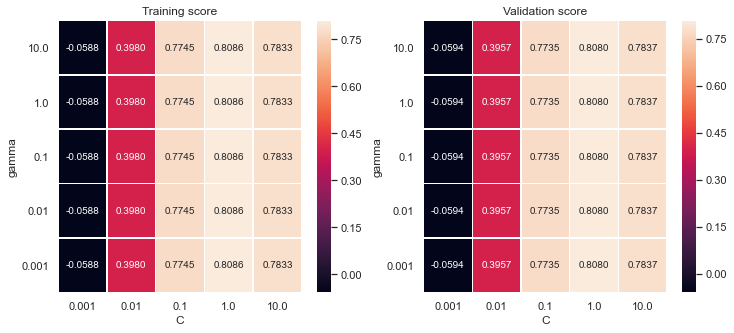

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.808633,0.807986,"{'C': 1, 'gamma': 10}"
1,0.808633,0.807986,"{'C': 1, 'gamma': 1}"
1,0.808633,0.807986,"{'C': 1, 'gamma': 0.1}"
1,0.808633,0.807986,"{'C': 1, 'gamma': 0.01}"
1,0.808633,0.807986,"{'C': 1, 'gamma': 0.001}"
6,0.783260,0.783713,"{'C': 10, 'gamma': 10}"
6,0.783260,0.783713,"{'C': 10, 'gamma': 0.1}"
6,0.783260,0.783713,"{'C': 10, 'gamma': 0.01}"
6,0.783260,0.783713,"{'C': 10, 'gamma': 0.001}"


In [46]:
# view the complete results
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svclinear_reg = GridSearchCV(SVR(kernel='linear', max_iter=2e3),
                             param_grid,
                             cv=5,
                             return_train_score=True,
                             scoring='r2')
svclinear_reg.fit(X_train, y_train)
svclinear_result = pd.DataFrame(svclinear_reg.cv_results_)
svclinear_result.index = svclinear_result.rank_test_score
svclinear_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svclinear_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svclinear_result[['mean_train_score', 'mean_test_score', 'params']]

In [37]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svclinear_reg.best_params_, svclinear_reg.best_score_))

Best Parameter: {'C': 1, 'gamma': 0.001}
Average cross-validation score: 0.8080


#### RBF

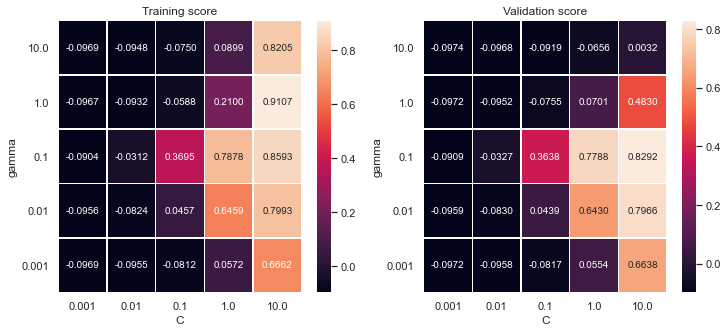

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.859274,0.829180,"{'C': 10, 'gamma': 0.1}"
2,0.799266,0.796558,"{'C': 10, 'gamma': 0.01}"
3,0.787827,0.778808,"{'C': 1, 'gamma': 0.1}"
4,0.666150,0.663751,"{'C': 10, 'gamma': 0.001}"
5,0.645917,0.642966,"{'C': 1, 'gamma': 0.01}"
6,0.910711,0.483046,"{'C': 10, 'gamma': 1}"
7,0.369452,0.363786,"{'C': 0.1, 'gamma': 0.1}"
8,0.209970,0.070127,"{'C': 1, 'gamma': 1}"
9,0.057217,0.055369,"{'C': 1, 'gamma': 0.001}"


In [47]:
# view the complete results
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'gamma': [0.001, 0.01, 0.1, 1, 10]
}
svcrbf_reg = GridSearchCV(SVR(kernel='rbf'),
                          param_grid,
                          cv=5,
                          n_jobs=-1,
                          return_train_score=True,
                          scoring='r2')
svcrbf_reg.fit(X_train, y_train)
svcrbf_result = pd.DataFrame(svcrbf_reg.cv_results_)
svcrbf_result.index = svcrbf_result.rank_test_score
svcrbf_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svcrbf_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svcrbf_result[['mean_train_score', 'mean_test_score', 'params']]

In [39]:
print('Best Parameter: {0}\nAverage cross-vlidation score: {1:.4f}'.format(
    svcrbf_reg.best_params_, svcrbf_reg.best_score_))

Best Parameter: {'C': 10, 'gamma': 0.1}
Average cross-vlidation score: 0.8292


#### Polynomial

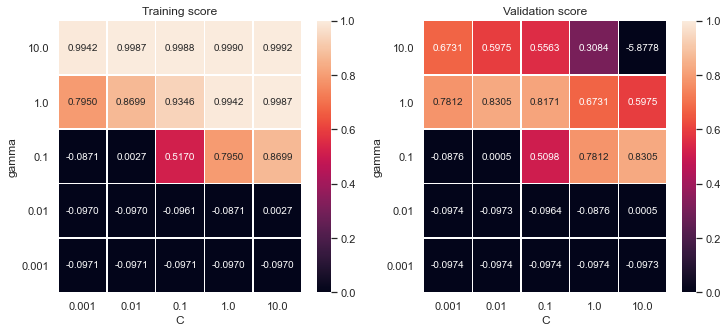

,mean_train_score,mean_test_score,params
rank_test_score,,,
1,0.869852,0.830515,"{'C': 10, 'gamma': 0.1}"
2,0.869852,0.830515,"{'C': 0.01, 'gamma': 1}"
3,0.934625,0.817064,"{'C': 0.1, 'gamma': 1}"
4,0.794967,0.781162,"{'C': 0.001, 'gamma': 1}"
5,0.794967,0.781162,"{'C': 1, 'gamma': 0.1}"
6,0.994200,0.673076,"{'C': 1, 'gamma': 1}"
7,0.994200,0.673075,"{'C': 0.001, 'gamma': 10}"
8,0.998673,0.597518,"{'C': 10, 'gamma': 1}"
9,0.998673,0.597516,"{'C': 0.01, 'gamma': 10}"


In [48]:
# view the complete results
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
svrpoly_reg = GridSearchCV(SVR(kernel = 'poly'),
                       param_grid,
                       cv=5,
                       n_jobs=-1,
                       return_train_score=True,
                       scoring='r2')
svrpoly_reg.fit(X_train, y_train)
svrpoly_result = pd.DataFrame(svrpoly_reg.cv_results_)
svrpoly_result.index = svrpoly_result.rank_test_score
svrpoly_result.sort_index(inplace=True)

# plot the mean cross-validation scores
results = pd.DataFrame(svrpoly_reg.cv_results_)
test_scores = np.array(results.mean_test_score).reshape(5, 5)
test_scores = pd.DataFrame(test_scores.T[::-1],
                           index=param_grid['C'][::-1],
                           columns=param_grid['gamma'])
train_scores = np.array(results.mean_train_score).reshape(5, 5)
train_scores = pd.DataFrame(train_scores.T[::-1],
                            index=param_grid['C'][::-1],
                            columns=param_grid['gamma'])

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

plt.sca(axes[0])
sns.heatmap(train_scores, vmax=1, vmin=0,annot=True, fmt='.4f', linewidths=.5)
plt.title('Training score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)

plt.sca(axes[1])
sns.heatmap(test_scores, vmax=1, vmin=0, annot=True, fmt='.4f', linewidths=.5)
plt.title('Validation score')
plt.xlabel('C')
plt.ylabel('gamma')
plt.yticks(rotation=0)
plt.show()

svrpoly_result[['mean_train_score', 'mean_test_score', 'params']]

In [41]:
print('Best Parameter: {0}\nAverage cross-validation score: {1:.4f}'.format(
    svrpoly_reg.best_params_, svrpoly_reg.best_score_))

Best Parameter: {'C': 10, 'gamma': 0.1}
Average cross-validation score: 0.8305


## Prediction

In [28]:
svr_poly = SVR(C=10, gamma=0.1, kernel='poly')
svr_poly.fit(X_train, y_train)
svr_poly.score(X_test, y_test)
print('Test score(R-square): {:.4f}'.format(svr_poly.score(X_test, y_test)))

Test score(R-square): 0.8258


In [29]:
from sklearn.metrics import mean_squared_error
y_pred =  svr_poly.predict(X_test)
print('Mean squared error: {:.4f}'.format(mean_squared_error(y_test, y_pred)))

Mean squared error: 14.2253


## Conclusion 
The best regression model is <font color="blue">Support Vector Regressor with polynomial kernel (SVR-poly)</font> as it performs highest average cross-validation score and r-squared in this task, 0.8189 and 0.8305 respectively. The test score and mean squared error for prediction is 0.8258 and 14.2253 respectively. In other words, the SVR-poly is able to explain 82.58% of the data.